<a href="https://colab.research.google.com/github/kavyakapoor200/Histroical-trade-data-analyser/blob/main/Primetrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import warnings

# Suppress warnings
warnings.simplefilter("ignore")

# Load dataset with optimized reading
df = pd.read_csv("dataset new.csv", low_memory=False)

# Display missing values before cleanup
print("Missing values before cleanup:\n", df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Display missing values after cleanup
print("Missing values after cleanup:\n", df.isnull().sum())

# Display the first few rows after cleanup
df.head()



Missing values before cleanup:
 Port_IDs         0
Trade_History    1
dtype: int64
Missing values after cleanup:
 Port_IDs         0
Trade_History    0
dtype: int64


,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [50]:
import ast
import numpy as np

# Convert Trade_History from string to list of dictionaries efficiently
df['Trade_History'] = df['Trade_History'].apply(ast.literal_eval)

# Expand trade history using list comprehension (faster than iterrows)
trades_list = [
    {**trade, 'Port_ID': row['Port_IDs']}
    for _, row in df.iterrows()
    for trade in row['Trade_History']
]

# Create structured trade DataFrame
trades_df = pd.DataFrame(trades_list)

# Display the first few rows
trades_df.head()


,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_ID
0,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1718899616000,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504


In [51]:
# Display missing values summary
missing_values = trades_df.isnull().sum()

# Show first 10 rows
preview_data = trades_df.head(10)

# Display dataset information
dataset_info = trades_df.info()

# Print all details
print("Missing Values:\n", missing_values, "\n")
print("Preview of Trades DataFrame:\n", preview_data, "\n")
print("Dataset Info:\n", dataset_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  int64  
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  bool   
 14  Port_ID              211277 non-null  int64  
dtypes: bool(1), float

Columns in trades_df: Index(['time', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy', 'Port_ID', 'trade_category'],
      dtype='object')
                 Port_ID  total_trades  profitable_trades    net_profit  \
47   3956048468100538880            28                 20   1373.564890   
62   3986814617275053313          3554               2780  16337.461881   
16   3891020560590657281           437                283   2856.300564   
144  4039279455324236544           327                181   1038.807419   
2    3768170840939476993            14                  6    243.668899   
92   4017110277719148289           252                143   2899.933021   
143  4039129759104249600           133                 59   1264.289200   
133  4035430878731345664            89                 43   2493.750420   
74   3998659472131949824           147                 72

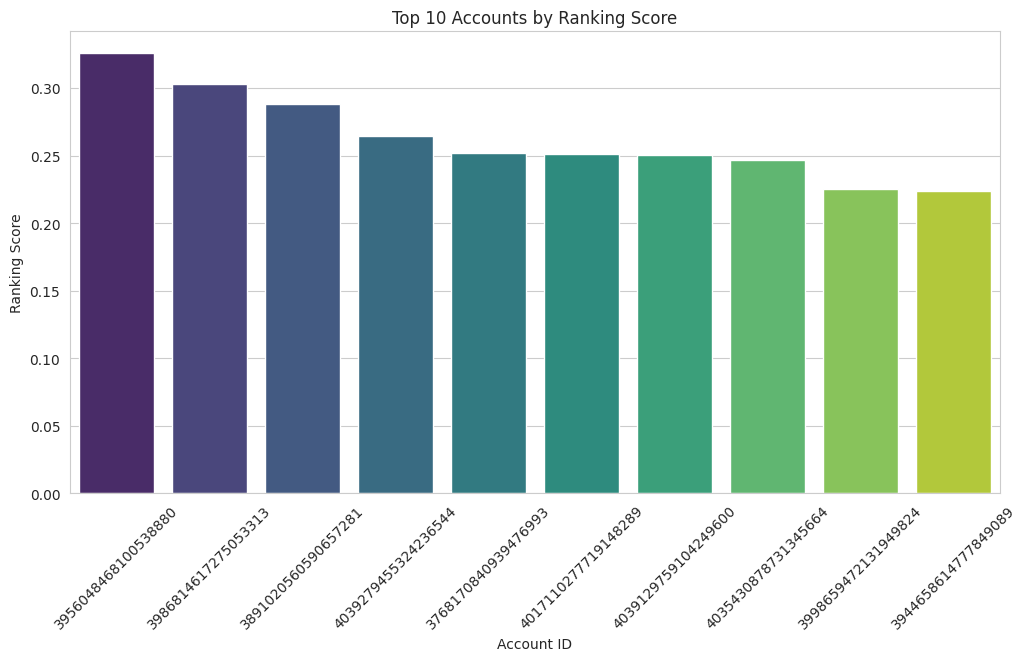

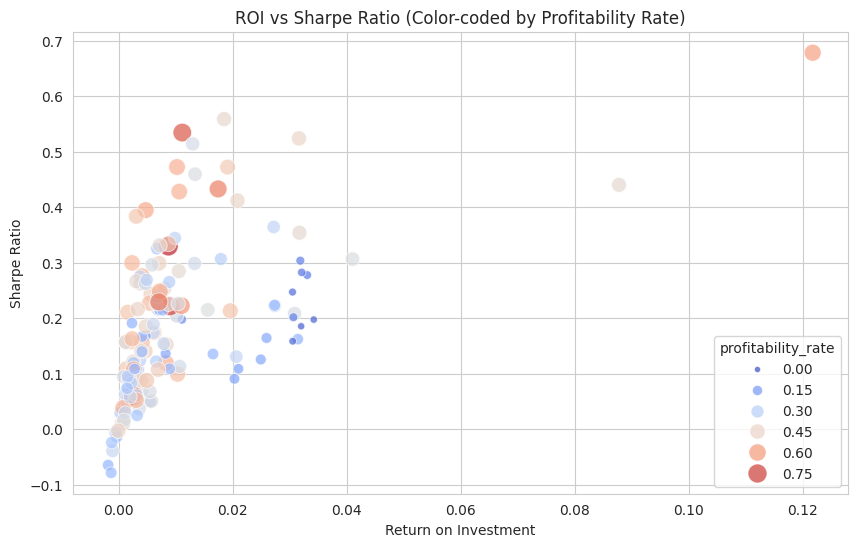

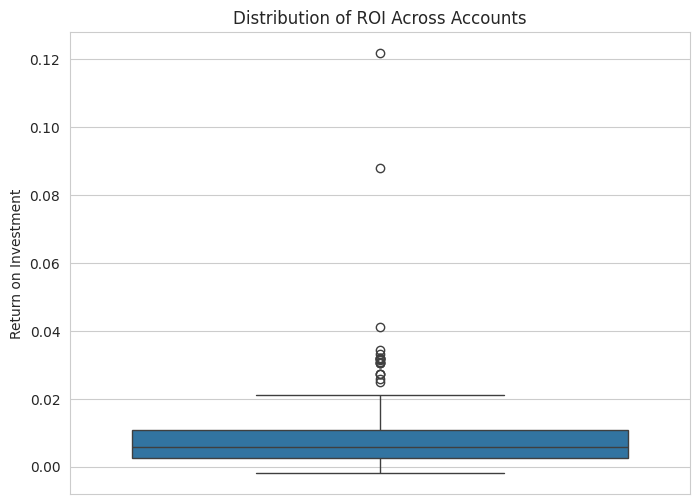

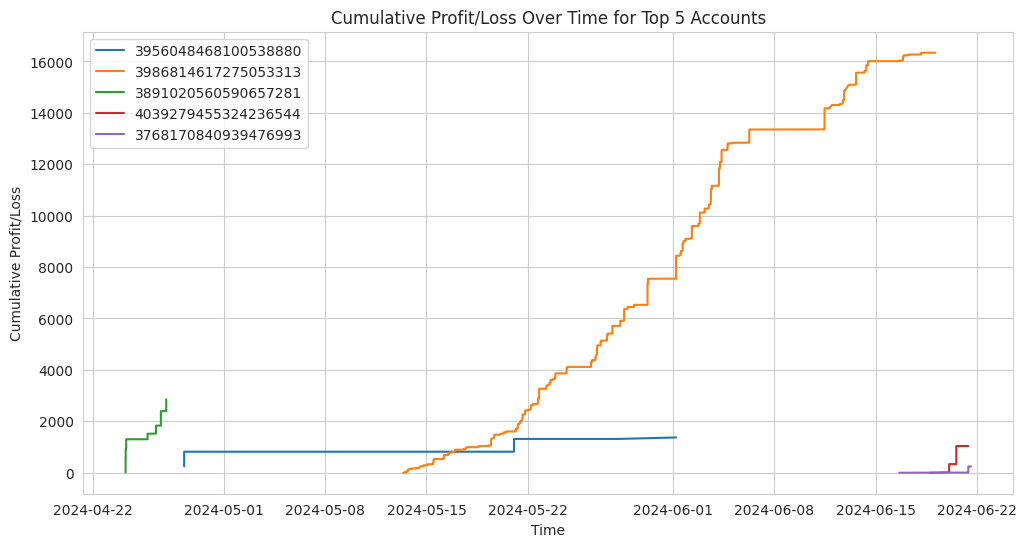

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Print columns for debugging
print("Columns in trades_df:", trades_df.columns)

# Ensure 'time' exists before conversion
if 'time' in trades_df.columns:
    trades_df['time'] = pd.to_datetime(trades_df['time'], unit='ms')
else:
    print("Error: 'time' column not found in trades_df")

# Ensure numeric columns
numeric_columns = ['price', 'quantity', 'fee', 'realizedProfit']
trades_df[numeric_columns] = trades_df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Classify trades into positions
trades_df['trade_category'] = trades_df['side'] + '_' + trades_df['positionSide']

# Aggregate metrics per account
account_stats = trades_df.groupby('Port_ID').agg(
    total_trades=('price', 'count'),
    profitable_trades=('realizedProfit', lambda x: (x > 0).sum()),
    net_profit=('realizedProfit', 'sum'),
    total_capital=('quantity', 'sum'),
).reset_index()

# Compute additional metrics safely
account_stats['return_on_investment'] = np.where(account_stats['total_capital'] > 0,
                                                 account_stats['net_profit'] / account_stats['total_capital'], np.nan)
account_stats['profitability_rate'] = np.where(account_stats['total_trades'] > 0,
                                               account_stats['profitable_trades'] / account_stats['total_trades'], np.nan)

def compute_sharpe_ratio(returns):
    if len(returns) < 2:
        return np.nan
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    return mean_return / std_dev if std_dev != 0 else np.nan

def compute_max_drawdown(returns):
    if len(returns) == 0:
        return np.nan
    cumulative_returns = np.cumsum(returns)
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = np.clip((running_max - cumulative_returns) / (running_max + 1e-9), 0, None)  # Avoid division by zero
    return np.max(drawdowns) * 100  # Convert to percentage

# Compute Sharpe & MDD efficiently
account_stats['sharpe_ratio'] = trades_df.groupby('Port_ID')['realizedProfit'].apply(compute_sharpe_ratio).reindex(account_stats['Port_ID']).values
account_stats['max_drawdown'] = trades_df.groupby('Port_ID')['realizedProfit'].apply(compute_max_drawdown).reindex(account_stats['Port_ID']).values

# Ranking System with weighted scores
account_stats['ranking_score'] = (
    account_stats['return_on_investment'].fillna(0) * 0.4 +
    account_stats['profitability_rate'].fillna(0) * 0.3 +
    account_stats['sharpe_ratio'].fillna(0) * 0.2 -
    account_stats['max_drawdown'].fillna(0) * 0.1
)

# Rank Accounts
account_stats = account_stats.sort_values(by='ranking_score', ascending=False)
top_accounts = account_stats.head(20)

# Save Results
account_stats.to_csv("Account_Performance.csv", index=False)
top_accounts.to_csv("Top_20_Accounts.csv", index=False)

# Display top results
print(top_accounts)

# Visualization
sns.set_style("whitegrid")

# Bar Chart - Top 10 Accounts by Score
plt.figure(figsize=(12, 6))
sns.barplot(x=top_accounts['Port_ID'].astype(str)[:10], y=top_accounts['ranking_score'][:10], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Account ID")
plt.ylabel("Ranking Score")
plt.title("Top 10 Accounts by Ranking Score")
plt.show()

# Scatter Plot - ROI vs. Sharpe Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=account_stats, x='return_on_investment', y='sharpe_ratio', hue='profitability_rate', palette="coolwarm", size='profitability_rate', sizes=(20, 200), alpha=0.7)
plt.xlabel("Return on Investment")
plt.ylabel("Sharpe Ratio")
plt.title("ROI vs Sharpe Ratio (Color-coded by Profitability Rate)")
plt.show()

# Box Plot - ROI Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=account_stats['return_on_investment'])
plt.ylabel("Return on Investment")
plt.title("Distribution of ROI Across Accounts")
plt.show()

# Line Chart - Cumulative PnL for Top 5 Accounts
plt.figure(figsize=(12, 6))
for account in top_accounts['Port_ID'][:5]:
    pnl_data = trades_df[trades_df['Port_ID'] == account].sort_values(by='time')
    cumulative_pnl = pnl_data['realizedProfit'].cumsum()
    plt.plot(pnl_data['time'], cumulative_pnl, label=str(account))

plt.xlabel("Time")
plt.ylabel("Cumulative Profit/Loss")
plt.title("Cumulative Profit/Loss Over Time for Top 5 Accounts")
plt.legend()
plt.show()
